In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import re

In [125]:
df = pd.read_csv("draft_df_cleaned.csv", index_col=0)
#df.rename(columns = {'FG%':'FGPercent', '3PM':'ThreePM', '3PA':'ThreePA', '3P%':'ThreePPercent', 'FT%':'FTPercent', '+/-':'PlusMinus'}, inplace=True)

In [126]:
df['ThreePPercent'] = pd.to_numeric(df['ThreePPercent'], errors='coerce')

In [130]:
df

,PLAYER,AFFILIATION,OVERALL PICK,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,...,BLK,PF,HEIGHT,WEIGHT,POSITION,ROTY,CENTER,FORWARD,GUARD,ROOKIE
0,Kwame Brown,Glynn Academy,1,2001,WAS,57.0,14.3,4.5,1.6,4.3,...,0.5,1.8,2.11,132.0,Center,0.0,1,0,0,0
1,Pau Gasol,FC Barcelona Basquet (Spain),3,2001,MEM,82.0,36.6,17.6,6.7,13.0,...,2.1,2.4,2.13,113.0,Center-Forward,1.0,1,1,0,0
2,Jason Richardson,Michigan State,5,2001,GSW,80.0,32.8,14.4,5.8,13.6,...,0.4,2.4,1.98,102.0,Guard,0.0,0,0,1,0
3,Shane Battier,Duke,6,2001,MEM,78.0,39.7,14.4,5.3,12.3,...,1.0,2.8,2.03,100.0,Forward,0.0,0,1,0,0
4,DeSagana Diop,Oak Hill Academy,8,2001,CLE,18.0,6.1,1.4,0.7,1.6,...,0.6,1.1,2.13,127.0,Center,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,Kendall Brown,Baylor,48,2022,Minnesota Timberwolves,34.0,27.1,9.7,3.9,6.6,...,0.4,2.3,2.03,93.0,Guard,NaN,0,0,1,1
867,Isaiah Mobley,Southern California,49,2022,Cleveland Cavaliers,31.0,20.4,6.2,2.4,5.0,...,0.6,2.2,2.03,108.0,Forward,NaN,0,1,0,1
868,Tyrese Martin,Connecticut,51,2022,Golden State Warriors,33.0,27.0,8.1,3.0,7.2,...,0.3,2.1,1.98,98.0,Guard,NaN,0,0,1,1
869,JD Davison,Alabama,53,2022,Boston Celtics,33.0,25.8,8.5,3.0,6.5,...,0.4,1.2,1.91,88.0,Guard,NaN,0,0,1,1


In [131]:
df_train = df[df['ROOKIE'] == 0]

In [132]:
df_train

,PLAYER,AFFILIATION,OVERALL PICK,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,...,BLK,PF,HEIGHT,WEIGHT,POSITION,ROTY,CENTER,FORWARD,GUARD,ROOKIE
0,Kwame Brown,Glynn Academy,1,2001,WAS,57.0,14.3,4.5,1.6,4.3,...,0.5,1.8,2.11,132.0,Center,0.0,1,0,0,0
1,Pau Gasol,FC Barcelona Basquet (Spain),3,2001,MEM,82.0,36.6,17.6,6.7,13.0,...,2.1,2.4,2.13,113.0,Center-Forward,1.0,1,1,0,0
2,Jason Richardson,Michigan State,5,2001,GSW,80.0,32.8,14.4,5.8,13.6,...,0.4,2.4,1.98,102.0,Guard,0.0,0,0,1,0
3,Shane Battier,Duke,6,2001,MEM,78.0,39.7,14.4,5.3,12.3,...,1.0,2.8,2.03,100.0,Forward,0.0,0,1,0,0
4,DeSagana Diop,Oak Hill Academy,8,2001,CLE,18.0,6.1,1.4,0.7,1.6,...,0.6,1.1,2.13,127.0,Center,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Charles Bassey,Western Kentucky,53,2021,PHI,23.0,7.3,3.0,1.3,2.0,...,0.7,1.4,2.06,104.0,Center-Forward,0.0,1,1,0,0
826,Sandro Mamukelashvili,Seton Hall,54,2021,MIL,41.0,9.9,3.8,1.4,2.8,...,0.2,0.7,2.06,109.0,Forward-Center,0.0,1,1,0,0
827,Aaron Wiggins,Maryland,55,2021,OKC,50.0,24.2,8.3,3.1,6.7,...,0.2,1.9,1.93,86.0,Guard,0.0,0,0,1,0
828,Scottie Lewis,Florida,56,2021,CHA,2.0,3.3,0.5,0.0,0.0,...,0.0,0.0,1.96,84.0,Guard,0.0,0,0,1,0


In [133]:
df_train.describe()

,OVERALL PICK,YEAR,GP,MIN,PTS,FGM,FGA,FGPercent,ThreePM,ThreePA,...,STL,BLK,PF,HEIGHT,WEIGHT,ROTY,CENTER,FORWARD,GUARD,ROOKIE
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.0
mean,26.687952,2012.155422,45.995181,15.353012,5.731205,2.166627,5.000241,42.124819,0.430241,1.322530,...,0.487711,0.331566,1.508554,2.005867,100.259036,0.024096,0.233735,0.532530,0.466265,0.0
std,16.283384,6.035175,24.949164,8.743893,4.244798,1.590292,3.472213,11.007286,0.506187,1.407111,...,0.371991,0.358682,0.805117,0.086617,11.983367,0.153441,0.423461,0.499242,0.499161,0.0
min,1.000000,2001.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.750000,73.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,12.000000,2007.000000,24.000000,8.500000,2.600000,1.000000,2.400000,37.900000,0.000000,0.100000,...,0.200000,0.100000,0.900000,1.930000,91.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,26.000000,2012.000000,48.000000,13.600000,4.600000,1.700000,4.100000,42.300000,0.300000,0.800000,...,0.400000,0.200000,1.500000,2.010000,100.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,40.000000,2018.000000,68.000000,21.300000,7.900000,3.000000,6.700000,47.100000,0.700000,2.100000,...,0.700000,0.500000,2.100000,2.080000,109.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,60.000000,2021.000000,82.000000,39.700000,22.500000,8.800000,17.900000,100.000000,2.500000,7.200000,...,2.200000,2.500000,4.100000,2.290000,141.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [134]:
df_quant = df_train.select_dtypes(include=np.number)
df_quant.columns

Index(['OVERALL PICK', 'YEAR', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FGPercent',
       'ThreePM', 'ThreePA', 'ThreePPercent', 'FTM', 'FTA', 'FTPercent',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'HEIGHT',
       'WEIGHT', 'ROTY', 'CENTER', 'FORWARD', 'GUARD', 'ROOKIE'],
      dtype='object')

C:\Users\asimp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


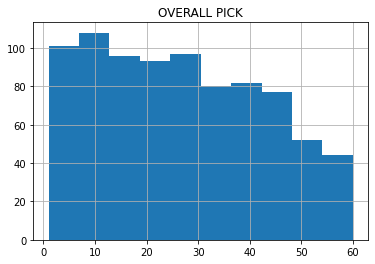

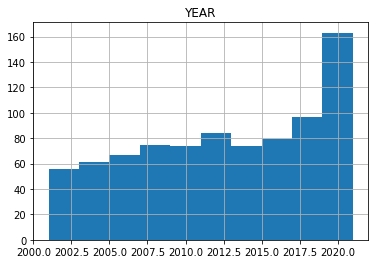

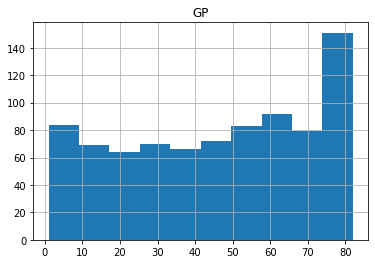

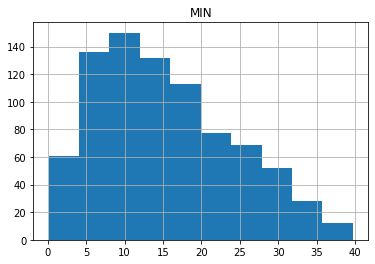

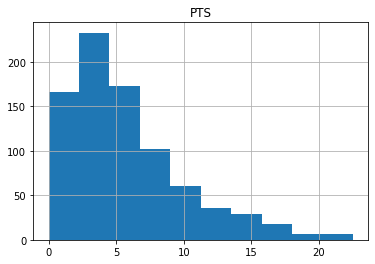

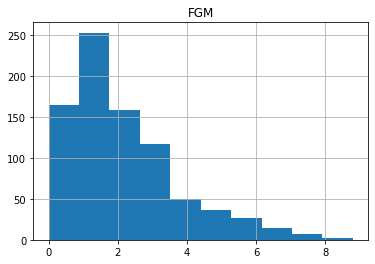

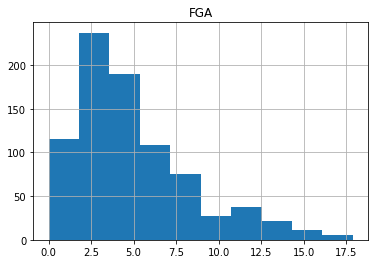

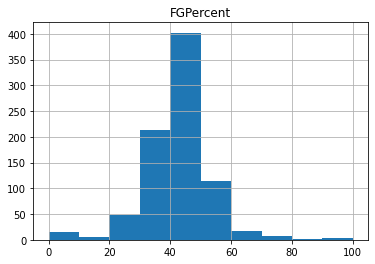

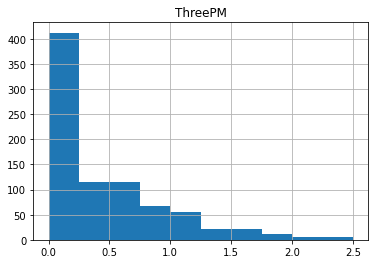

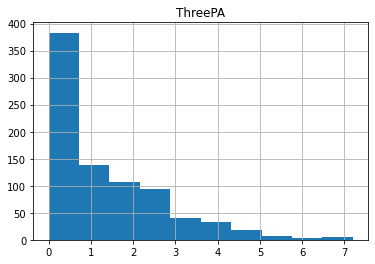

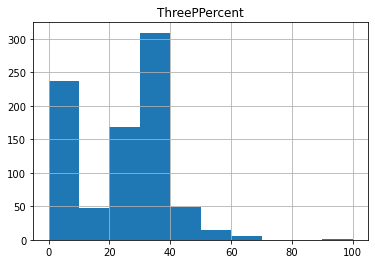

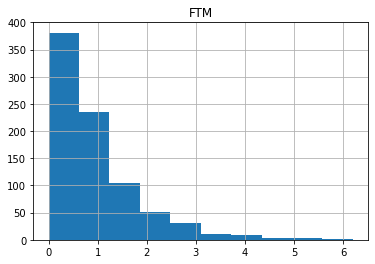

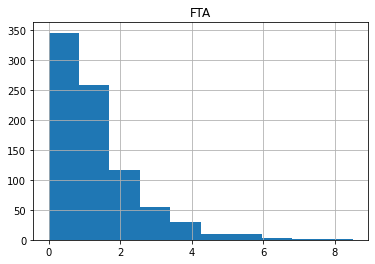

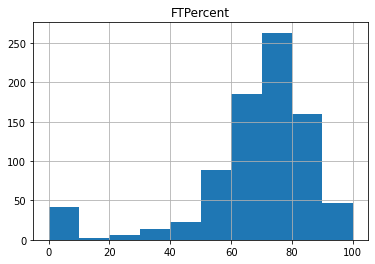

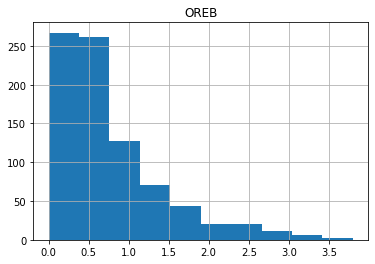

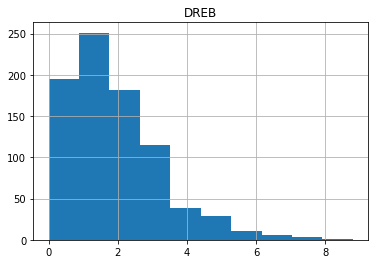

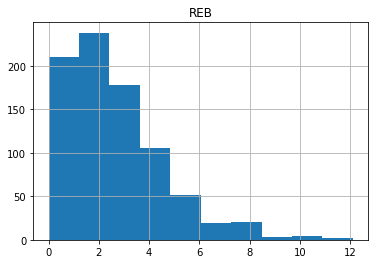

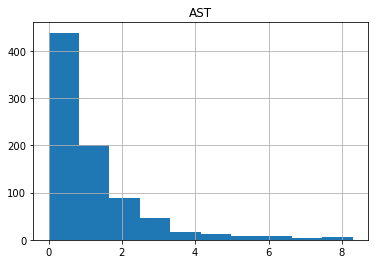

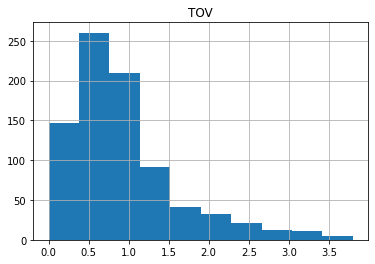

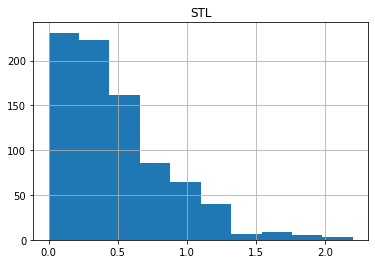

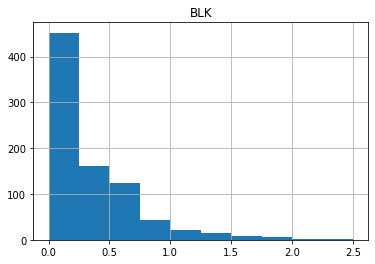

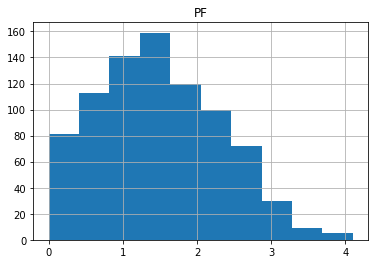

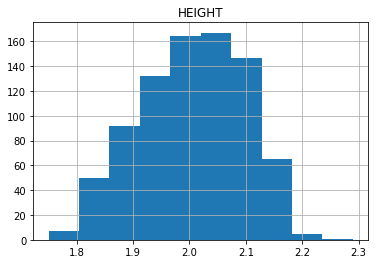

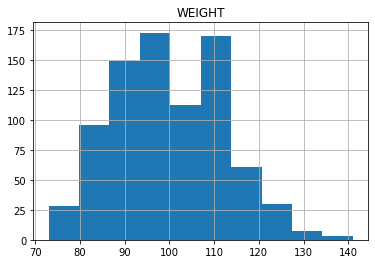

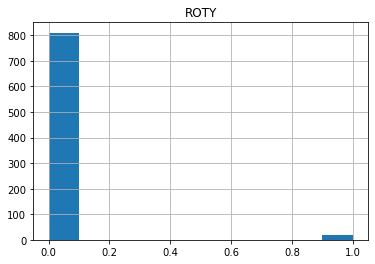

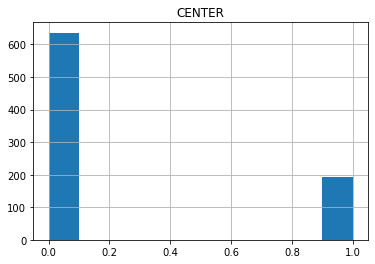

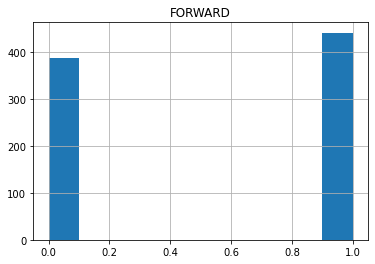

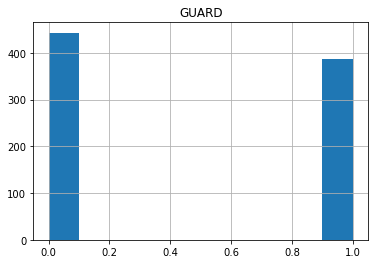

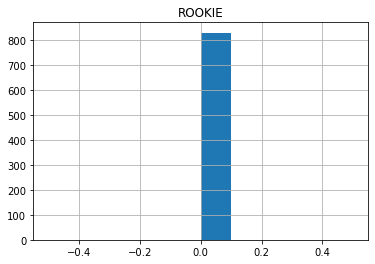

In [135]:
for i in df_quant.columns:
    fig = df_quant.hist(i)
    fig


C:\Users\asimp\AppData\Local\Temp/ipykernel_17160/1008370968.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


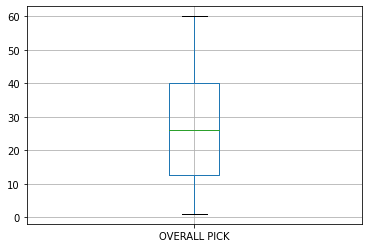

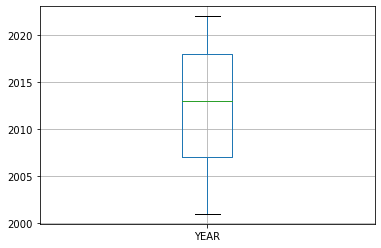

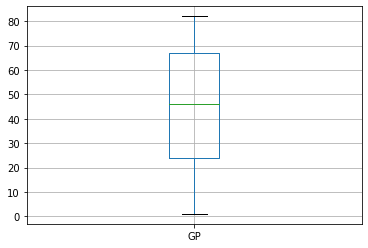

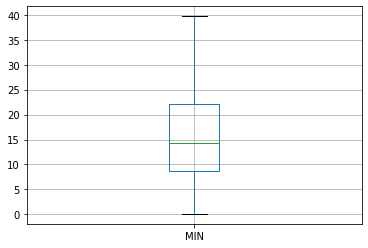

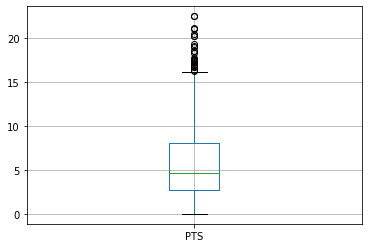

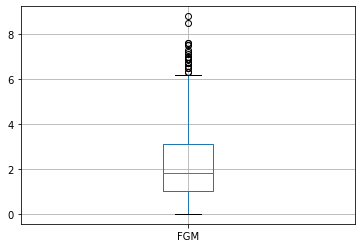

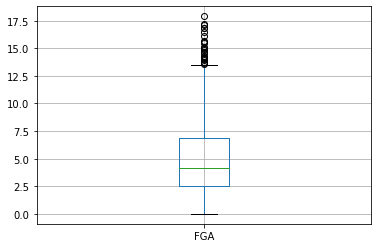

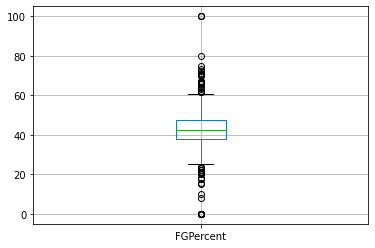

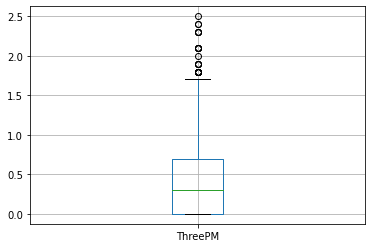

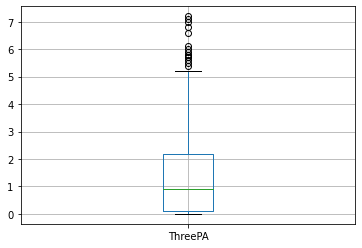

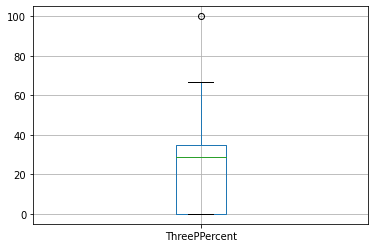

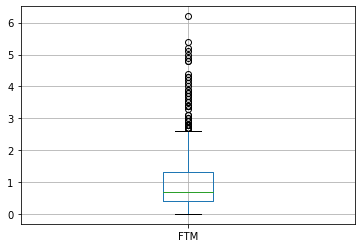

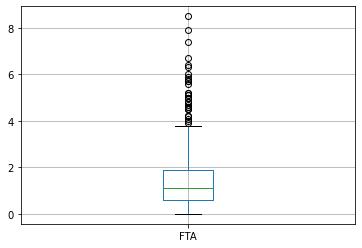

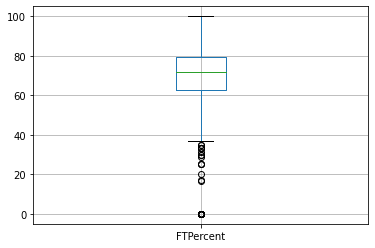

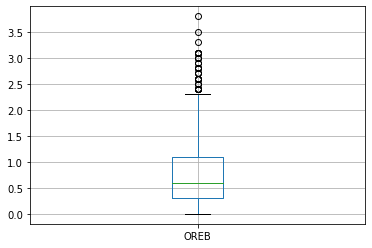

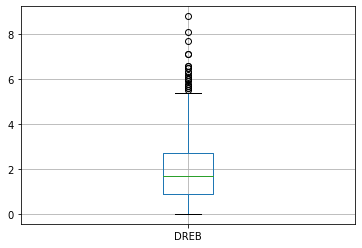

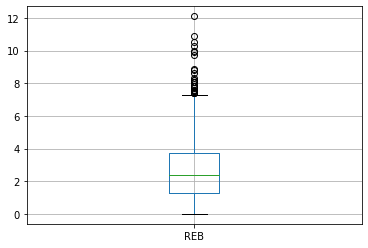

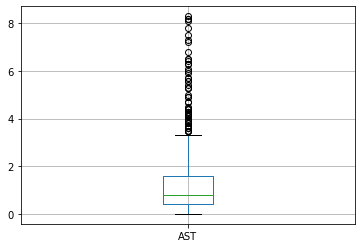

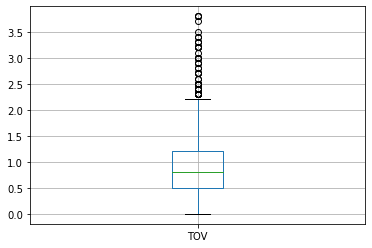

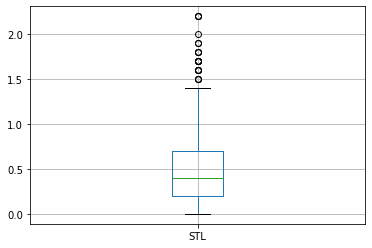

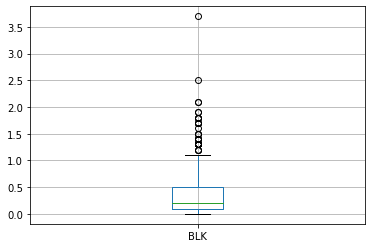

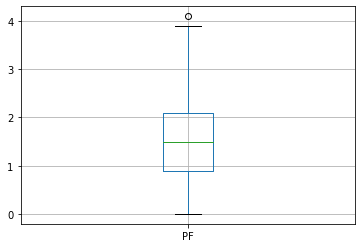

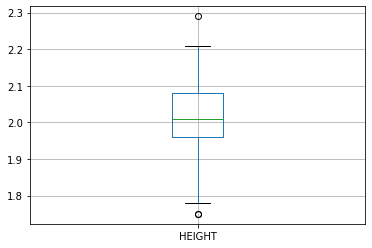

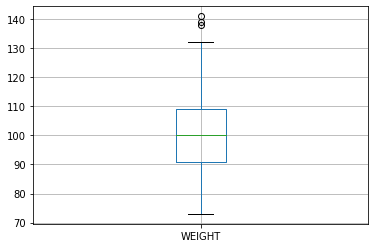

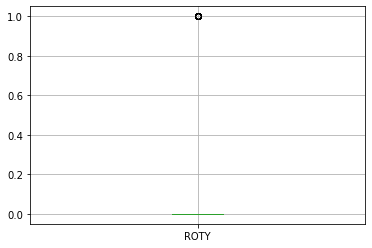

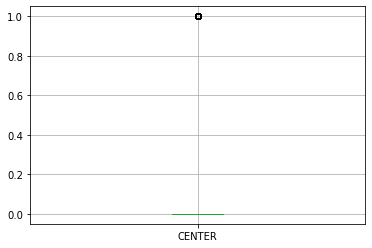

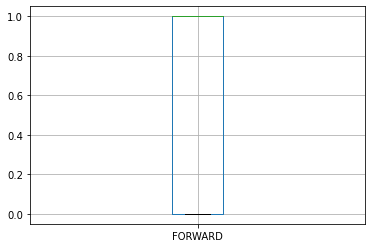

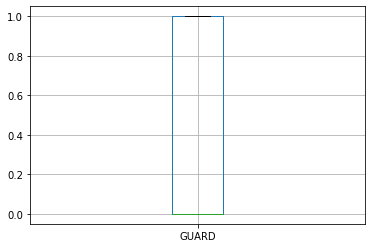

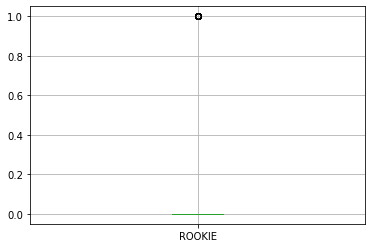

In [136]:
for column in df_quant:
    plt.figure()
    df.boxplot([column])

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

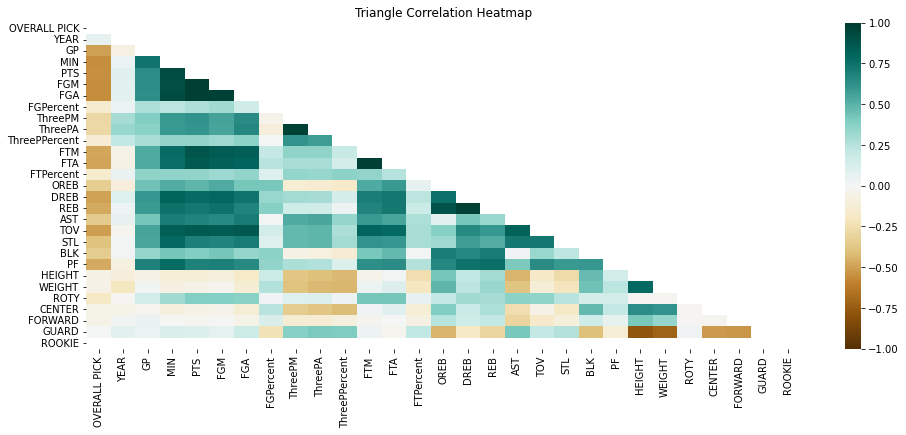

In [137]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
corr = df_quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap')

Text(0.5, 1.0, 'Features Correlating with ROTY')

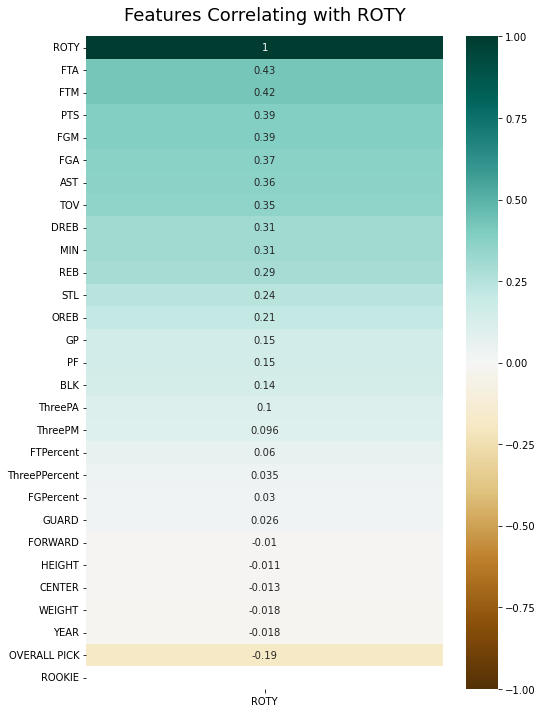

In [138]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_train.corr()[['ROTY']].sort_values(by='ROTY', ascending=False), vmin=-1, vmax=1, 
                      annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with ROTY', fontdict={'fontsize':18}, pad=16)

In [139]:
df_train = df_train.rename(columns=lambda x: re.sub(' ','',x)) #dmatrices gets syntax error with space present in name

ptcor = "ROTY ~ FGM + ThreePA + FTM"

rebcor = "ROTY ~ OREB + DREB + BLK"

scor = "ROTY ~ GP + TOV + AST + STL + OVERALLPICK"

corlist = [ptcor, rebcor, scor]

for c in corlist: #produces VIF tables with stats that correlate to eachother such as things that contribute to pts
    
    y, X = dmatrices(c, data=df_train, return_type='dataframe')


    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['variable'] = X.columns

    print(vif)

        VIF   variable
0  2.912885  Intercept
1  4.548473        FGM
2  1.514930    ThreePA
3  3.642453        FTM
        VIF   variable
0  3.033039  Intercept
1  2.769944       OREB
2  2.490263       DREB
3  2.118321        BLK
         VIF     variable
0  15.719471    Intercept
1   1.718810           GP
2   4.039227          TOV
3   3.477927          AST
4   2.582754          STL
5   1.519192  OVERALLPICK


In [140]:
mcorr = "ROTY ~ ThreePA + FTM + OREB + BLK + GP + AST + STL + FGPercent + ThreePPercent + FTPercent + PF + \
HEIGHT + WEIGHT + CENTER + FORWARD + GUARD + OVERALLPICK + YEAR"

y, X = dmatrices(mcorr, data=df_train, return_type='dataframe')


vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

print(vif)

              VIF       variable
0   156346.737923      Intercept
1        2.676907        ThreePA
2        2.831759            FTM
3        3.534463           OREB
4        2.601932            BLK
5        2.493270             GP
6        3.264945            AST
7        3.026374            STL
8        1.362691      FGPercent
9        1.798608  ThreePPercent
10       1.374368      FTPercent
11       3.763471             PF
12       4.358924         HEIGHT
13       3.428328         WEIGHT
14       2.600452         CENTER
15       1.961132        FORWARD
16       3.524703          GUARD
17       1.579428    OVERALLPICK
18       1.369708           YEAR


In [141]:
pd.pivot_table(df_train, index="TEAM", values="ROTY", aggfunc='sum').sort_values("ROTY", ascending=False)

,ROTY
TEAM,
POR,2.0
CHA,2.0
MIN,2.0
MEM,2.0
PHI,2.0
PHX,1.0
NOH,1.0
LAC,1.0
MIL,1.0


In [142]:
pd.pivot_table(df, index="AFFILIATION", values="ROTY", aggfunc='sum').sort_values("ROTY", ascending=False).head(20)

,ROTY
AFFILIATION,
Real Madrid Baloncesto (Spain),1.0
Florida State,1.0
Kentucky,1.0
Connecticut,1.0
Louisiana State,1.0
Syracuse,1.0
Cypress Creek,1.0
Virginia,1.0
Oklahoma,1.0


In [143]:
pd.pivot_table(df_train, index="POSITION", values="ROTY", aggfunc="sum").sort_values("ROTY", ascending=False)

,ROTY
POSITION,
Guard,9.0
Forward,5.0
Center-Forward,2.0
Center,1.0
Forward-Center,1.0
Forward-Guard,1.0
Guard-Forward,1.0


In [144]:
df_train[["ROTY", "ThreePA", "FTM", "OREB", "BLK", "GP", "AST", "STL", "FGPercent", "ThreePPercent", \
         "FTPercent", "PF", "HEIGHT", "WEIGHT", "CENTER", "FORWARD", "GUARD", "OVERALLPICK", "YEAR"]] #cols with low VIF

,ROTY,ThreePA,FTM,OREB,BLK,GP,AST,STL,FGPercent,ThreePPercent,FTPercent,PF,HEIGHT,WEIGHT,CENTER,FORWARD,GUARD,OVERALLPICK,YEAR
0,0.0,0.0,1.2,1.1,0.5,57.0,0.8,0.3,38.7,0.0,70.7,1.8,2.11,132.0,1,0,0,1,2001
1,1.0,0.1,4.1,2.9,2.1,82.0,2.7,0.5,51.8,20.0,70.9,2.4,2.13,113.0,1,1,0,3,2001
2,0.0,3.1,1.8,1.6,0.4,80.0,3.0,1.3,42.6,33.3,67.1,2.4,1.98,102.0,0,0,1,5,2001
3,0.0,3.5,2.5,2.3,1.0,78.0,2.8,1.6,42.9,37.3,70.0,2.8,2.03,100.0,0,1,0,6,2001
4,0.0,0.0,0.1,0.3,0.6,18.0,0.3,0.1,41.4,0.0,20.0,1.1,2.13,127.0,1,0,0,8,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,0.0,0.2,0.4,1.0,0.7,23.0,0.3,0.2,63.8,0.0,75.0,1.4,2.06,104.0,1,1,0,53,2021
826,0.0,1.3,0.4,0.9,0.2,41.0,0.5,0.2,49.6,42.3,81.8,0.7,2.06,109.0,1,1,0,54,2021
827,0.0,2.8,1.2,1.0,0.2,50.0,1.4,0.6,46.3,30.4,72.9,1.9,1.93,86.0,0,0,1,55,2021
828,0.0,0.0,0.5,0.0,0.0,2.0,0.5,0.5,0.0,0.0,50.0,0.0,1.96,84.0,0,0,1,56,2021
